### Linear Regression

Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more explanatory variables / independent variables / exogenous variables / features / predictors. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.

Linear Regression is an example of supervised learning.

### Interactive Examples

- https://setosa.io/ev/ordinary-least-squares-regression/
- https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html
- https://www.miabellaai.net/index.html

### Family of Linear Regression

- Linear Regression (y is continuous)
- Logistic Regression (y is binary)
- Poisson Regression (y is count/rate)

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, t
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

### EDA

In [2]:
df_full = pd.read_csv('cars.csv'); df_full.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [3]:
df = df_full[['mpg', 'cylinders', 'displacement', 'weight']]; df.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504.0
1,15.0,8,350.0,3693.0
2,18.0,8,318.0,3436.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [5]:
df.describe().T[['min', 'max']]

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
weight,1613.0,5140.0


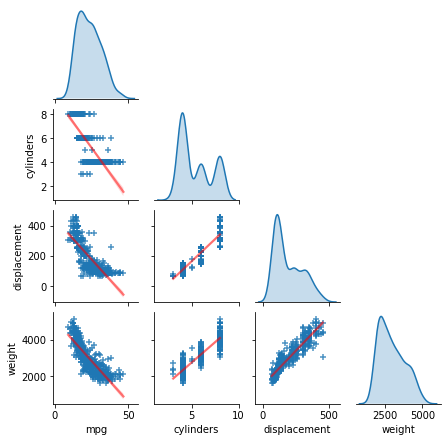

In [6]:
sns.pairplot(df, palette='husl', corner=True, diag_kind='kde', kind='reg', markers='+', 
                 plot_kws={'line_kws':{'color':'red', 'alpha':0.5}}, height=1.5);

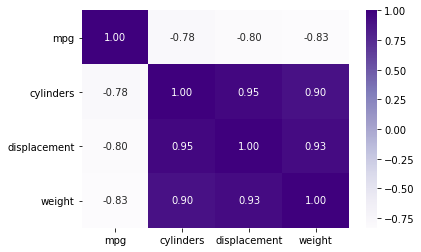

In [7]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='Purples');

In [8]:
y = df.mpg
X = df[['cylinders', 'displacement', 'weight']]

### Equation of a line

The basic equation of a line is $y = mx + b$, but a more general form for multiple predictors is $\hat{y}_i = \beta_0 + \beta_1 x1_i + \ldots + \beta_p xp_i$. Here $\hat{y}_i$ is the predicted output of the model for each sample, $i$. We convert this equation into the vectorized form $y = X\hat{\beta}$, where $y$ and $\hat{\beta}$ are vectors and $X$ is a matrix. In this case $\hat{\beta}$ our parameter is what we are looking to solve. Here is the final form:

$\hat{\beta} = (X^T X)^{-1} X^T y$

### Model Training

In [9]:
# training
model = LinearRegression().fit(X, y)

### Model Evaluation

In [10]:
# model parameters
model.intercept_, model.coef_

(44.447235909625235, array([-0.24392852, -0.01283703, -0.00576317]))

In [11]:
# rank of X matrix
model.rank_

3

In [12]:
# comparing y to y_hat
y_hat = model.predict(X)
list(zip(y, y_hat))[:5]

[(18.0, 18.360677496409135),
 (15.0, 16.719445326551565),
 (18.0, 18.61136602069135),
 (16.0, 18.808373950271875),
 (17.0, 18.741837221573267)]

In [13]:
# R-squared
r2_score(y, y_hat)

0.6982455718143367

In [14]:
# root mean squared error
mean_squared_error(y, y_hat) ** 0.5

4.288093262999564

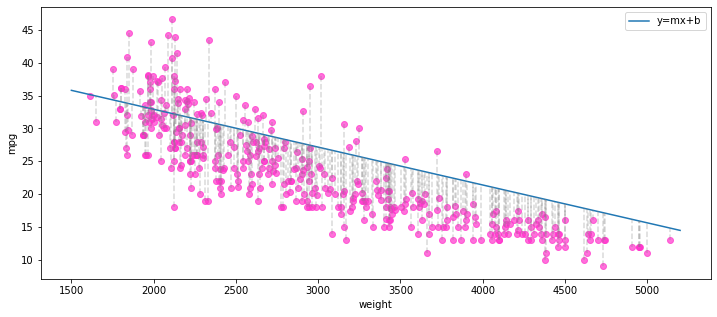

In [15]:
# visualize mpg vs weight, fitted line, and residuals
xs = np.linspace(1500, 5200)
b0 = model.intercept_
b1 = model.coef_[-1]
ys =  b0 + (b1 * xs)

plt.figure(figsize=(12, 5))
plt.scatter(X.weight, y, c='#ff33cc', alpha=0.7)
plt.plot(xs, ys, label='y=mx+b')
for x_i, y_i in zip(X.weight, y):
    plt.plot([x_i, x_i], [y_i, b1*x_i+b0], color='gray', linestyle='dashed', alpha=0.3)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend();

### Data Types

Categorical data comes in two types

- Nominal (no order)
- Ordinal (order)

Numerical data comes in two types

- Discrete (integers)
- Continuous (float)

In [44]:
df_full.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [45]:
# origin is the country where car was manufactured, let's one-hot encode this value
df_full.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [46]:
# we are dropping one of the columns due to multicolinearity constraints
df_origin = pd.get_dummies(df_full.origin, prefix='origin', drop_first=True); df_origin.head(3)

,origin_2,origin_3
0,0,0
1,0,0
2,0,0


In [47]:
# concatenating two dataframes
df_final = pd.concat([df, df_origin], axis=1); df_final.head(3)

,mpg,cylinders,displacement,weight,origin_2,origin_3
0,18.0,8,307.0,3504.0,0,0
1,15.0,8,350.0,3693.0,0,0
2,18.0,8,318.0,3436.0,0,0


In [48]:
# now, build a new linear regression model with the updated dataset